# Cosine Similarities for classification

## Dataset

In [1]:
import pandas as pd

In [71]:
df = pd.read_excel('data/dataset_for_topic_labeling.xlsx')
df['date'] = pd.to_datetime(df['date'])

In [72]:
df.head()

,id,group,sender,text,reply,date,reactions,topic,keywords
0,19045,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,553874639,"Hi, I'm still looking for a team to do the RAS...",NaN,2023-10-15 07:46:57+00:00,{},1. Project/assignment/homework,NaN
1,19177,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,6532068962,Does anyone still have a spot for the requirem...,NaN,2023-10-26 08:16:19+00:00,{},1. Project/assignment/homework,NaN
2,19160,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,414785325,for all sections?,19159.0,2023-10-23 22:32:09+00:00,{},1. Project/assignment/homework,NaN
3,19004,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,5452059839,"Hi guys, we are two people looking for a 3rd m...",NaN,2023-10-10 21:05:16+00:00,{},1. Project/assignment/homework,NaN
4,27730,https://t.me/joinchat/QeBrjx97pwI4NDVk,163752298,That of the subsystem with H = 0,NaN,2023-06-22 11:23:20+00:00,{},1. Project/assignment/homework,NaN


In [73]:
df.iloc[0]['topic']

'1. Project/assignment/homework'

In [74]:
df_sorted = df.sort_values(by=['group', 'date'])

In [10]:
df_sorted.reset_index(drop=True, inplace=True)

In [75]:
df_sorted.head()

,id,group,sender,text,reply,date,reactions,topic,keywords
1376,18839,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,656307950,NaN,NaN,2023-09-21 08:14:31+00:00,{},8. Other,NaN
57,18842,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,780674374,[Camilli] Guys have we talked about Deadline t...,NaN,2023-09-21 09:42:39+00:00,{},1. Project/assignment/homework,NaN
19,18843,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,217728591,[Rossi] If someone wanted to make the rasd in ...,NaN,2023-09-21 11:08:41+00:00,{},1. Project/assignment/homework,NaN
13,18844,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,948924104,Is the division into groups so binding?,NaN,2023-09-21 11:43:11+00:00,{},1. Project/assignment/homework,NaN
92,18845,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,948924104,"that is, it is necessary to be with the same p...",NaN,2023-09-21 11:43:27+00:00,{},1. Project/assignment/homework,NaN


In [76]:
df_clean = df_sorted.dropna(subset=['text'])

In [77]:
df_clean.reset_index(drop=True, inplace=True)
df_clean.head()

,id,group,sender,text,reply,date,reactions,topic,keywords
0,18842,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,780674374,[Camilli] Guys have we talked about Deadline t...,NaN,2023-09-21 09:42:39+00:00,{},1. Project/assignment/homework,NaN
1,18843,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,217728591,[Rossi] If someone wanted to make the rasd in ...,NaN,2023-09-21 11:08:41+00:00,{},1. Project/assignment/homework,NaN
2,18844,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,948924104,Is the division into groups so binding?,NaN,2023-09-21 11:43:11+00:00,{},1. Project/assignment/homework,NaN
3,18845,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,948924104,"that is, it is necessary to be with the same p...",NaN,2023-09-21 11:43:27+00:00,{},1. Project/assignment/homework,NaN
4,18851,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,890474850,But are the homework in a group?,NaN,2023-09-21 12:00:23+00:00,{},1. Project/assignment/homework,NaN


In [78]:
df_clean.tail()

,id,group,sender,text,reply,date,reactions,topic,keywords
4093,21531,https://t.me/joinchat/zYSU3QDIPppkZmQ0,317691228,[Restelli] someone could send what he wrote on...,NaN,2024-05-02 13:33:02+00:00,{'❤': 2},6. Materials/recordings,NaN
4094,21535,https://t.me/joinchat/zYSU3QDIPppkZmQ0,2008525123,"Guys, anyone knows at which slide Loiacono arr...",NaN,2024-05-08 13:35:11+00:00,{},NaN,NaN
4095,21536,https://t.me/joinchat/zYSU3QDIPppkZmQ0,382281069,"Guys, do you know if today's lecture is exerci...",NaN,2024-05-09 10:07:07+00:00,{},7. class information/class sessions,NaN
4096,21540,https://t.me/joinchat/zYSU3QDIPppkZmQ0,236364502,(loiacono)\nI couldn't follow the exercise ses...,NaN,2024-05-09 17:36:17+00:00,{},6. Materials/recordings,NaN
4097,21541,https://t.me/joinchat/zYSU3QDIPppkZmQ0,814882875,Can someone who took notes in the last exercis...,NaN,2024-05-11 16:28:16+00:00,{},NaN,NaN


In [79]:
df_clean['topic'] = df_clean['topic'].fillna(method='ffill')

C:\Users\asus-zen\AppData\Local\Temp\ipykernel_5952\4069968296.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean['topic'] = df_clean['topic'].fillna(method='ffill')
C:\Users\asus-zen\AppData\Local\Temp\ipykernel_5952\4069968296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['topic'] = df_clean['topic'].fillna(method='ffill')


In [80]:
df_clean

,id,group,sender,text,reply,date,reactions,topic,keywords
0,18842,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,780674374,[Camilli] Guys have we talked about Deadline t...,NaN,2023-09-21 09:42:39+00:00,{},1. Project/assignment/homework,NaN
1,18843,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,217728591,[Rossi] If someone wanted to make the rasd in ...,NaN,2023-09-21 11:08:41+00:00,{},1. Project/assignment/homework,NaN
2,18844,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,948924104,Is the division into groups so binding?,NaN,2023-09-21 11:43:11+00:00,{},1. Project/assignment/homework,NaN
3,18845,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,948924104,"that is, it is necessary to be with the same p...",NaN,2023-09-21 11:43:27+00:00,{},1. Project/assignment/homework,NaN
4,18851,https://t.me/joinchat/8Z9Y0f3ymPw3NzNk,890474850,But are the homework in a group?,NaN,2023-09-21 12:00:23+00:00,{},1. Project/assignment/homework,NaN
...,...,...,...,...,...,...,...,...,...
4093,21531,https://t.me/joinchat/zYSU3QDIPppkZmQ0,317691228,[Restelli] someone could send what he wrote on...,NaN,2024-05-02 13:33:02+00:00,{'❤': 2},6. Materials/recordings,NaN
4094,21535,https://t.me/joinchat/zYSU3QDIPppkZmQ0,2008525123,"Guys, anyone knows at which slide Loiacono arr...",NaN,2024-05-08 13:35:11+00:00,{},6. Materials/recordings,NaN
4095,21536,https://t.me/joinchat/zYSU3QDIPppkZmQ0,382281069,"Guys, do you know if today's lecture is exerci...",NaN,2024-05-09 10:07:07+00:00,{},7. class information/class sessions,NaN
4096,21540,https://t.me/joinchat/zYSU3QDIPppkZmQ0,236364502,(loiacono)\nI couldn't follow the exercise ses...,NaN,2024-05-09 17:36:17+00:00,{},6. Materials/recordings,NaN


In [15]:
import pandas as pd
from collections import defaultdict

# Dizionario per raccogliere le keyword per ciascun topic
keywords_by_topic = defaultdict(set)

# Itera su ciascuna riga del DataFrame
for index, row in df.iterrows():
    topic = row['topic']
    keywords = row['keywords']
    
    if pd.notna(keywords):  # Controlla se le keyword non sono NaN
        for keyword in keywords.split(','):  # Separa le keyword (qui assumiamo che siano separate da virgole)
            keyword = keyword.strip()  # Rimuovi eventuali spazi bianchi
            if keyword:  # Aggiungi solo se non è una stringa vuota
                keywords_by_topic[topic].add(keyword)

# Converti il set in lista per ciascun topic
keywords_by_topic = {k: list(v) for k, v in keywords_by_topic.items()}

# Stampa o salva le liste di keyword per ciascun topic
for topic, keywords in keywords_by_topic.items():
    print(f"Topic {topic}: {keywords}")


Topic 1. Project/assignment/homework: ['solved', 'homework', 'group', 'submission', 'project', 'presentation', 'upload', 'peer review', 'answer', 'question', 'team', 'exercise', 'miniproject', 'challenge', 'prepare']
Topic 2. Exam/oral exam/mid term: ['midterm', 'precall', 'pass', 'taking exam', 'appeal', 'pre-appeal', 'correction', 'quiz', 'exam', 'calls', 'calculator', 'written', 'remote', 'vote']
Topic 4. Deadline/important dates: ['deadline', 'by tomorro', 'calendar', 'appeals', 'verbalization', 'date', 'dates']
Topic 5. Grades/marks/results: ['publish', 'scores', 'weeks', 'published', 'grade exam', 'votes', 'received', 'extra', 'points', 'results', 'vote', 'publication', 'point']
Topic 6. Materials/recordings: ['solution', 'materials', 'notes', 'algorithm', 'notebook', 'webeep', 'fact', 'exercise', 'solutions', 'explain', 'example', 'answer', 'wrong', 'practice', 'write', 'previous exams', 'old exam', 'slide', 'question', 'recording', 'soloution', 'calculate', 'recorded', 'past ex

In [29]:
from collections import defaultdict
from nltk.corpus import wordnet
import nltk
# Scaricare i dati di WordNet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\asus-
[nltk_data]     zen\AppData\Roaming\nltk_data...


True

In [30]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    return synonyms


keywords_by_topic = defaultdict(set)

for index, row in df.iterrows():
    topic = row['topic']
    keywords = row['keywords']
    
    if pd.notna(keywords): 
        for keyword in keywords.split(','):  
            keyword = keyword.strip() 
            if keyword:  
                synonyms = get_synonyms(keyword)
                keywords_by_topic[topic].update(synonyms)
                keywords_by_topic[topic].add(keyword)


keywords_by_topic = {k: list(v) for k, v in keywords_by_topic.items()}

for topic, keywords in keywords_by_topic.items():
    print(f"Topic {topic}: {keywords}")

Topic 1. Project/assignment/homework: ['interrogate', 'train', 'result', 'doubtfulness', 'display', 'machinate', 'doubt', 'visualise', 'presentation', 'resolved', 'develop', 'send off', 'projection', 'picture', 'interrogation', 'figure', 'exercise', 'wonder', 'meekness', 'labor', 'physical exertion', 'practise', 'make', 'utilization', 'exert', 'take exception', 'employment', 'gainsay', 'answer', 'design', 'practice session', 'usage', 'clear', 'use', 'image', 'externalise', 'radical', 'prep', 'workout', 'prepare', 'dubiousness', 'resolve', 'squad', 'solved', 'serve', 'contrive', 'set', 'team', 'ready', 'team up', 'externalize', 'fix', 'lick', 'question', 'suffice', 'reply', 'stick out', 'dispute', 'work', 'project', 'throw', 'resolution', 'jut out', 'drill', 'figure out', 'get up', 'solvent', 'call into question', 'aggroup', 'submission', 'solution', 'preparation', 'do', 'respond', 'entry', 'group', 'gear up', 'utilisation', 'query', 'fancy', 'devise', 'presentment', 'compliance', 'inqu

In [37]:
import pandas as pd
from collections import defaultdict
from laserembeddings import Laser
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Initialize LASER
laser = Laser()


In [38]:
# Group all keywords by topic
keywords_by_topic = defaultdict(set)

for index, row in df_clean.iterrows():
    topic = row['topic']
    keywords = row['keywords']
    
    if pd.notna(keywords):  # Check if keywords are not NaN
        for keyword in keywords.split(','):  # Split keywords (assuming they are comma-separated)
            keyword = keyword.strip()  # Remove any whitespace
            if keyword:  # Add only if it's not an empty string
                keywords_by_topic[topic].add(keyword)

# Convert the set to a list for each topic
keywords_by_topic = {k: list(v) for k, v in keywords_by_topic.items()}

# Combine all keywords into a single string for each topic
keywords_string_by_topic = {topic: ' '.join(keywords) for topic, keywords in keywords_by_topic.items()}

In [69]:
print(topic)

D


In [70]:
for topic in sorted(keywords_by_topic.keys(), key=lambda x: int(x.split('.')[0])):
    keywords = keywords_by_topic[topic]
    print(f"Topic {topic}: {keywords}")

Topic 1. Project/assignment/homework: ['solved', 'homework', 'group', 'project', 'presentation', 'upload', 'peer review', 'answer', 'question', 'team', 'exercise', 'miniproject', 'prepare', 'challenge', 'submission']
Topic 2. Exam/oral exam/mid term: ['midterm', 'precall', 'pass', 'taking exam', 'appeal', 'quiz', 'pre-appeal', 'correction', 'exam', 'calculator', 'calls', 'written', 'remote', 'vote']
Topic 4. Deadline/important dates: ['deadline', 'by tomorro', 'verbalization', 'date', 'calendar', 'appeals', 'dates']
Topic 5. Grades/marks/results: ['publish', 'scores', 'weeks', 'published', 'grade exam', 'votes', 'received', 'extra', 'results', 'points', 'vote', 'publication', 'point']
Topic 6. Materials/recordings: ['solution', 'notes', 'materials', 'algorithm', 'notebook', 'webeep', 'fact', 'exercise', 'explain', 'solutions', 'example', 'answer', 'wrong', 'practice', 'write', 'previous exams', 'old exam', 'slide', 'recording', 'question', 'calculate', 'soloution', 'recorded', 'past ex

In [39]:
# Calculate embeddings for each string of keywords for each topic
topic_embeddings = {topic: laser.embed_sentences([keywords_string], lang='en')[0] for topic, keywords_string in keywords_string_by_topic.items()}

C:\Users\asus-zen\AppData\Local\Temp\ipykernel_5952\3280457322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text'] = df_clean['text'].fillna('')
C:\Users\asus-zen\AppData\Local\Temp\ipykernel_5952\3280457322.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_embedding'] = df_clean['text'].apply(lambda x: laser.embed_sentences([x], lang='en')[0])
C:\Users\asus-zen\AppData\Local\Temp\ipykernel_5952\3280457322.py:19: SettingWithCopyWarning: 
A value is trying to be set on a cop

      id                                   group     sender  \
0  18842  https://t.me/joinchat/8Z9Y0f3ymPw3NzNk  780674374   
1  18843  https://t.me/joinchat/8Z9Y0f3ymPw3NzNk  217728591   
2  18844  https://t.me/joinchat/8Z9Y0f3ymPw3NzNk  948924104   
3  18845  https://t.me/joinchat/8Z9Y0f3ymPw3NzNk  948924104   
4  18851  https://t.me/joinchat/8Z9Y0f3ymPw3NzNk  890474850   

                                                text  reply  \
0  [Camilli] Guys have we talked about Deadline t...    NaN   
1  [Rossi] If someone wanted to make the rasd in ...    NaN   
2            Is the division into groups so binding?    NaN   
3  that is, it is necessary to be with the same p...    NaN   
4                   But are the homework in a group?    NaN   

                       date reactions                           topic  \
0 2023-09-21 09:42:39+00:00        {}  1. Project/assignment/homework   
1 2023-09-21 11:08:41+00:00        {}  1. Project/assignment/homework   
2 2023-09-21 11:43:11+0

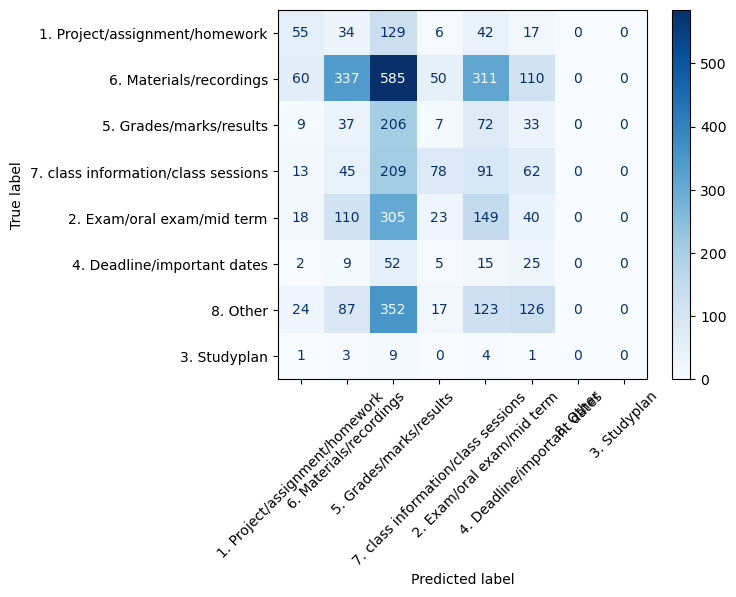

ValueError: Excel does not support datetimes with timezones. Please ensure that datetimes are timezone unaware before writing to Excel.

In [41]:
# Replace NaN values in the 'text' column with empty strings
df_clean['text'] = df_clean['text'].fillna('')

# Calculate embeddings for the messages in the dataset
df_clean['text_embedding'] = df_clean['text'].apply(lambda x: laser.embed_sentences([x], lang='en')[0])

In [49]:
# Function to calculate cosine similarity between a message embedding and a topic embedding
def compute_cosine_similarity(message_embedding, topic_embedding):
    return cosine_similarity([message_embedding], [topic_embedding])[0][0]

# Calculate cosine similarity for each message against embeddings of each topic and find the topic with the highest similarity
def classify_message(row):
    message_embedding = row['text_embedding']
    similarities = {topic: compute_cosine_similarity(message_embedding, topic_embedding) for topic, topic_embedding in topic_embeddings.items()}
    best_topic = max(similarities, key=similarities.get)
    return best_topic, similarities

# Apply classification to each message
df_clean[['predicted_topic', 'similarities']] = df_clean.apply(classify_message, axis=1, result_type='expand')

# Print the updated DataFrame
print(df_clean.head())

      id                                   group     sender  \
0  18842  https://t.me/joinchat/8Z9Y0f3ymPw3NzNk  780674374   
1  18843  https://t.me/joinchat/8Z9Y0f3ymPw3NzNk  217728591   
2  18844  https://t.me/joinchat/8Z9Y0f3ymPw3NzNk  948924104   
3  18845  https://t.me/joinchat/8Z9Y0f3ymPw3NzNk  948924104   
4  18851  https://t.me/joinchat/8Z9Y0f3ymPw3NzNk  890474850   

                                                text  reply  \
0  [Camilli] Guys have we talked about Deadline t...    NaN   
1  [Rossi] If someone wanted to make the rasd in ...    NaN   
2            Is the division into groups so binding?    NaN   
3  that is, it is necessary to be with the same p...    NaN   
4                   But are the homework in a group?    NaN   

                       date reactions                           topic  \
0 2023-09-21 09:42:39+00:00        {}  1. Project/assignment/homework   
1 2023-09-21 11:08:41+00:00        {}  1. Project/assignment/homework   
2 2023-09-21 11:43:11+0

C:\Users\asus-zen\AppData\Local\Temp\ipykernel_5952\1729133339.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['predicted_topic', 'similarities']] = df_clean.apply(classify_message, axis=1, result_type='expand')


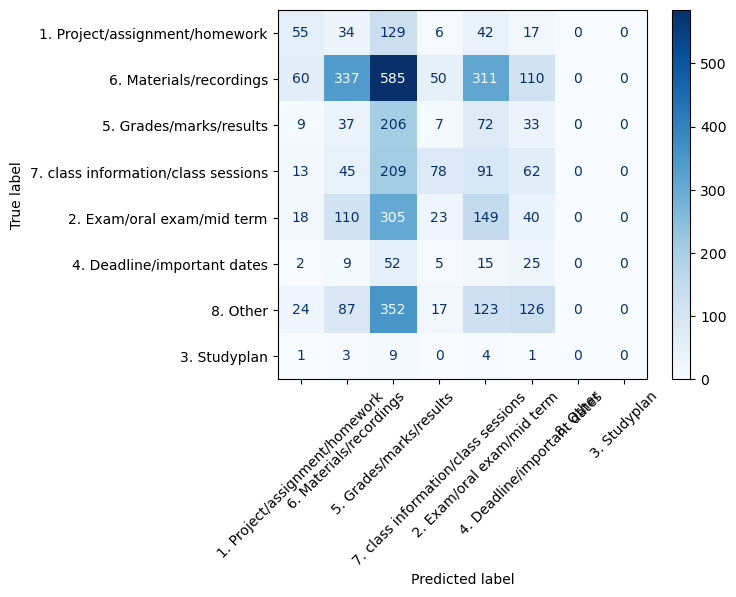

In [50]:
# Create a confusion matrix
true_labels = df_clean['topic']
predicted_labels = df_clean['predicted_topic']

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=true_labels.unique())

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=true_labels.unique())
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.xticks(rotation=45)
plt.show()

In [60]:
save_df = df_clean.copy()

In [62]:
# Convert datetime columns to strings
datetime_columns = save_df.select_dtypes(include=['datetimetz', 'datetime']).columns
for col in datetime_columns:
    save_df[col] = save_df[col].astype(str)

# Save the updated DataFrame to an Excel file
save_df.to_excel('final_cos_sim_dataset_topic.xlsx', index=False)

print("Dataset saved to 'final_cos_sim_dataset_topic.xlsx'")

Dataset saved to 'final_cos_sim_dataset_topic.xlsx'


In [51]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=true_labels.unique(), output_dict=True)

# Print overall metrics
print("Overall Precision:", report['macro avg']['precision'])
print("Overall Recall:", report['macro avg']['recall'])
print("Overall F1-score:", report['macro avg']['f1-score'])

# Print the classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=true_labels.unique()))

c:\Users\asus-zen\anaconda3\envs\py31013\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus-zen\anaconda3\envs\py31013\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus-zen\anaconda3\envs\py31013\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Overall Precision: 0.1983961526778618
Overall Recall: 0.20141625311633643
Overall F1-score: 0.158833257588693
Classification Report:
                                     precision    recall  f1-score   support

     1. Project/assignment/homework       0.30      0.19      0.24       283
            6. Materials/recordings       0.18      0.23      0.21       645
            5. Grades/marks/results       0.00      0.00      0.00        18
7. class information/class sessions       0.06      0.23      0.10       108
         2. Exam/oral exam/mid term       0.11      0.57      0.19       364
        4. Deadline/important dates       0.51      0.23      0.32      1453
                           8. Other       0.42      0.16      0.23       498
                       3. Studyplan       0.00      0.00      0.00       729

                           accuracy                           0.21      4098
                          macro avg       0.20      0.20      0.16      4098
                  

c:\Users\asus-zen\anaconda3\envs\py31013\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus-zen\anaconda3\envs\py31013\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
